# Introduction

    Thuật toán Hồi quy logistic (Logistic Regression) là một thuật toán thuộc nhóm các thuật toán phân lớp.

    Không giống như hồi quy tuyến tính, thuật toán hồi quy logistic sử dụng một hàm sigmoid logistic để trả về một giá trị xác suất có thể được ánh xạ tới hai hoặc nhiều lớp rời rạc

## So sánh hồi quy tuyến tính và hồi quy logistic

    Hồi quy tuyến tính có thể giúp người ta dự đoán được các giá trị liên tục

    Dự đoán hồi quy logistic là rời rạc (chỉ cho phép các giá trị hoặc danh mục cụ thể), Chúng ta cũng có thể xem điểm xác suất của các dự đoán

<img src="./md_img/2.png" width="500" height="350">

<img src="./md_img/1.png" width="500" height="350">

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_frame = pd.read_csv('./dataset/data_classification.csv')
data_frame

,Slept,Studied,Passed
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1
...,...,...,...
95,0.022280,2.658428,0
96,7.630637,7.405351,1
97,3.684997,5.049965,0
98,7.484260,6.059396,1


In [36]:
passed_slept = []
passed_studied = []
failed_slept = []
failed_studied = []

for item in data_frame.values:
    if item[2] == 1:
        passed_slept.append(item[0])
        passed_studied.append(item[1])
    else:
        failed_slept.append(item[0])
        failed_studied.append(item[1])  
         

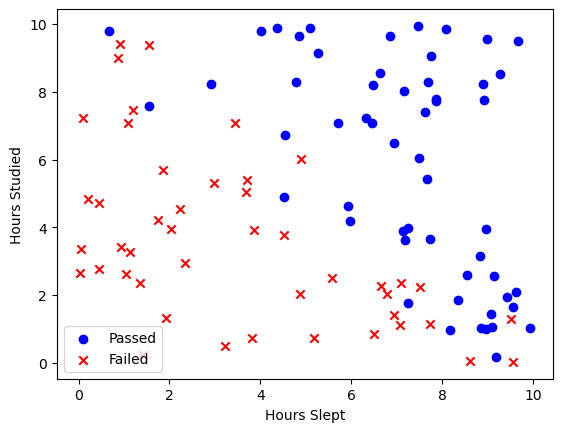

In [37]:
plt.scatter(passed_slept, passed_studied, marker='o', c='b', label='Passed')
plt.scatter(failed_slept, failed_studied, marker='x', c='r', label='Failed')
plt.xlabel('Hours Slept')
plt.ylabel('Hours Studied')
plt.legend(loc ='lower left')
plt.show()

In [38]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def make_decision(p):
    if p >= 0.5:
        return 1
    else:
        return 0

def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)

def cost_function(features, labels, weights):
    """
    :param features: (100*3)
    :param labels:  (100*1)
    :param weights: (3*1)
    :return:
    """
    n =  len(labels)
    predictions = predict(features, weights)
    '''
    predictions
    [0.6, 0.7, 0.4, 0.6]
    [1, 0, 1, 0]
    '''

    cost_class1 = -labels*np.log(predictions)
    # [0.5, 0, 0.4, 0]
    cost_class2 = -(1-labels)*np.log(1-predictions)
    # [0, 0.52, 0, 0.66]
    cost = cost_class1 + cost_class2
    
    return np.sum(cost)/n

<img src="./md_img/3.png" width="500" height="260">

In [39]:
def update_weight(features, labels, weights, learning_rate):
    """
    :param features: (100*3)
    :param labels:  (100*1)
    :param weights: (3*1)
    :param learning_rate: float
    :return: new_weight: float
    """
    
    n = len(labels)
    # giá trị dự đoán của tất cả các điểm
    predictions = predict(features, weights)
    gradient_descent = np.dot(features.T, (predictions - labels))/n
    weights -= gradient_descent * learning_rate
    return weights

In [40]:
def train(features, labels, weights, learning_rate, iter):
    cost_his = []
    for i in range(iter):
        weights = update_weight(features, labels, weights, learning_rate)
        cost = cost_function(features, labels, weights)
        cost_his.append(cost)

    return weights, cost_his

In [41]:
# Chuẩn bị dữ liệu đầu vào
X = data_frame.values[:, :2]  # features (hours slept, hours studied)
y = data_frame.values[:, 2]   # labels (0 or 1)

# Thêm cột 1 vào ma trận features (cho bias)
X = np.insert(X, 0, 1, axis=1)

# Khởi tạo weights ban đầu
weights = np.zeros(X.shape[1])

# Thiết lập thông số huấn luyện
learning_rate = 0.01
iterations = 100

# Huấn luyện mô hình
trained_weights, loss_his = train(X, y, weights, learning_rate, iterations)

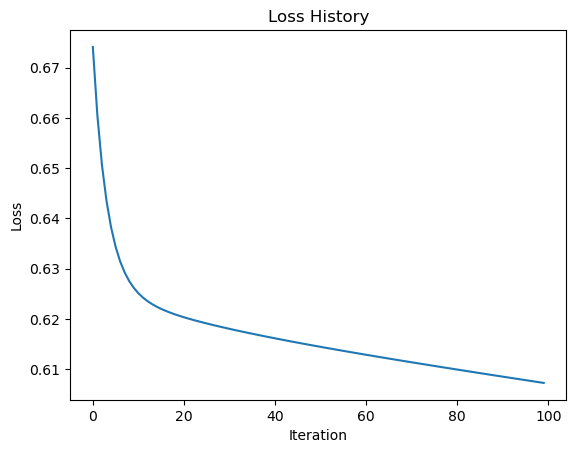

In [42]:
# In biểu đồ loss_his
plt.plot(loss_his)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

In [43]:
# Dự đoán cho giá trị cụ thể
new_sample = np.array([1, 6.86, 9.65]) 
prediction = make_decision(predict(new_sample, trained_weights))

print("Prediction for sample", new_sample[1:], ":", prediction)

Prediction for sample [6.86 9.65] : 1
